## Lichess Dataset Analysis

This will be a fairly open-ended analysis, with a goal of gaining useful and applicable insights for chess players!

In [2]:
# Import important Modules
!pip install plotly
import pandas as pd
import numpy as np

import seaborn as sb
import matplotlib
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder 
%matplotlib inline

You are using pip version 19.0.3, however version 19.3.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


## Exploratory Analysis


In [3]:
# Load data, and print first 5 rows displaying all columns
data = pd.read_csv("games.csv")
data.head()

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5


In [4]:
# How many Distinct Players do we have?
# Get totals from both black and white which are unique, combine them, then get unique players from that combined list

unique_white = data["white_id"].unique().tolist()
unique_black = data["black_id"].unique().tolist()
unique_white.extend(unique_black)

all_players = []
for player in unique_white:
    if player not in all_players:
        all_players.append(player)

print("Number of unique Players:", len(all_players))


Number of unique Players: 15635


Quick Note about ratings:
- Ratings in Chess are important, they obviously determine the skill of a player
- We should make sure that our dataset is a good representation of a balanced collection of players
- On Lichess.org if you follow this link https://lichess.org/stat/rating/distribution/blitz the average rating (blitz) overall is around the 1200 to 1600 mark, so if our dataset gives us an average player rating in this range, we will be happy
- Extra Info: )
     - Grandmasters tend to have an online rating of over 2500 (Magnus Carlsen, World Champion = 3100+), so picking out               their games (if there         are any) would be very beneficial in future analysis
     - Very few break 2800 rating, so we can't expect many players of that level in this dataset

Mean Rating: 1592.73
Max Rating: 2723
Min Rating: 784
Std Rating: 291.16


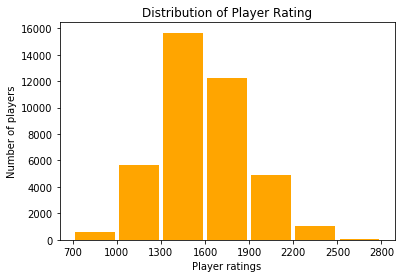

In [5]:
# Remember, rating is changing every game, and since there are plenty of games with the same players,
# a player in this dataset cannot be linked to one single rating

# lets get a measure of the distribution of the ratings of the players for each game
ratings = data["white_rating"].tolist()
b_ratings = data["black_rating"].tolist()
ratings.extend(b_ratings)

# Basic Insights into what ratings we are working with
mean_rating, max_rating, min_rating, std_rating = round(np.mean(ratings), 2), max(ratings), min(ratings), round(np.std(ratings), 2)
print("Mean Rating:", mean_rating)
print("Max Rating:", max_rating)
print("Min Rating:", min_rating)
print("Std Rating:", std_rating)

# Set up a histogram, bins start from 700 to 2800+ is a good range in general for online chess analysis)

# For the bins, bin "length" of 300 seemed reasonable as it distinguishes the different skill levels well 
bins = [i for i in range(700, 3100, 300)]

plt.hist(ratings, bins, histtype="bar", rwidth=0.9, color="orange")
plt.title("Distribution of Player Rating")
plt.xlabel("Player ratings")
plt.ylabel("Number of players")
plt.xticks(range(700, 3100, 300))
plt.show()


##### Takeaways from the plot

- The above plot shows the data sort of follows a normal distribution, 
    - where the mean rating = 1592.73 and standard deviation = 291.16
- Our data is a good in the sense that it generally represents an accurate population of approximately 15,000 chess players
- We can see that most players fall in between 1300 to 1900
- There are also more in the 1000 to 1300 range than the 1900 to 2200 range 

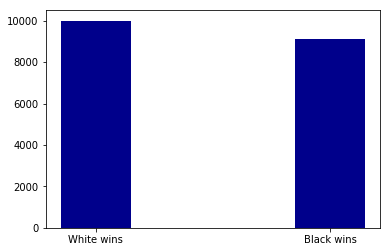

In [6]:
# We can get a count of how many wins there were for each color
white_wins = data["winner"].tolist().count("white")
black_wins = data["winner"].tolist().count("black")


plt.bar(["White wins", "Black wins"], [white_wins, black_wins], color="darkblue", width=0.3)
plt.show()

#### Note:
- This is a good indicator of a well balanced dataset, as overall it is known that having the white pieces, instantly gives you a small advantage in a game of chess. 
- So, it makes sense, that there are slightly more white wins than there are black

In [7]:
# we can see how many unique openings are played
openings_unique = data["opening_name"].unique().tolist()
print("Number of unique openings:", len(openings_unique))

Number of unique openings: 1477


In [8]:
# Q1 - white opening move is always first move, so just first two characters in each string in each moves column 
list_of_first_moves = [moves[:2] for moves in data["moves"]]

# not many opening moves possible, so we can easily put all possible into a list
poss_opening_moves = ["a3", "a4", "b3", "b4", "c3", "c4", "d3", "d4", "e3", "e4", "f3", "f4", "g3", "g4", "h3", "h4", "Nf", "Nh", "Na", "Nc"]

dict_moves_count = {}

for op_move in poss_opening_moves:
    dict_moves_count[op_move] = list_of_first_moves.count(op_move)
print("Count of moves Dictionary:", dict_moves_count)


Count of moves Dictionary: {'a3': 27, 'a4': 28, 'b3': 173, 'b4': 88, 'c3': 56, 'c4': 716, 'd3': 131, 'd4': 4522, 'e3': 416, 'e4': 12598, 'f3': 23, 'f4': 166, 'g3': 186, 'g4': 38, 'h3': 14, 'h4': 33, 'Nf': 725, 'Nh': 15, 'Na': 4, 'Nc': 99}


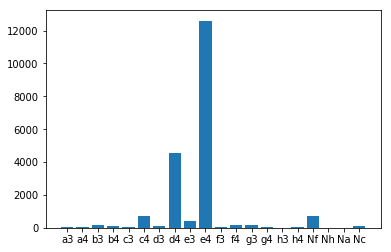

In [9]:
# Plot moves frequency via bar chart
plt.bar(range(len(dict_moves_count)), list(dict_moves_count.values()), align="center")
plt.xticks(range(len(dict_moves_count)), list(dict_moves_count.keys()))
plt.show()


#### Takeaways from plot

- We know before coming in that d4 and e4 were the most common moves.
- This seems to be evident from the plot, so we can confirm that this data is generally accurate of a common chess 20,000 games




## Great.... Now to start Preparing the data for modelling process

- Create new difference between rating column
- Encode winner column, rated, Opening Eco, victory status
- The time for the game is going to be a factor I'm sure, but need to think about how to encode this one
    - I will say 4 categories 
        - (t < 3 is Bullet)
        - (t >= 3 and t <= 15 is Blitz)
        - (t >= 15 and t <= 30 is Rapid)
        - (t >= 30 is Classical)
- Remove the necassary colunms
    - moves, opening name, open_ply columns (we only need opening eco)
    - created_at and last_move_at (not necessary)
    - game_id, white_id, black_id


In [10]:
# rating difference column creation
def dif(col_1val, col_2val):
    return col_1val - col_2val
data["rating_diff"] = [dif(data["white_rating"][i], data["black_rating"][i]) for i in range(len(data))]


In [19]:
# Encode necessary columns, create new DataFrame
data_copy = data.copy()
l_encode = LabelEncoder()

# Encode winner (target) = 0, 1, 2 (0 black loss, 1 draw, 2 white win)
data_copy["EncWinner"] = l_encode.fit_transform(data["winner"])

data_copy["EncRated"] = l_encode.fit_transform(data["rated"])
data_copy["EncOpeningEco"] = l_encode.fit_transform(data["opening_eco"])
data_copy["EncVictoryStatus"] = l_encode.fit_transform(data["victory_status"])

# Encode Time control (increment_code) column into 4 categories (Bullet, Blitz, Rapid, Classical)
def encode_time(time):
    index_plus = time.index("+")
    minutes = int(time[:index_plus])
    
    if minutes < 3:
        return 0
    elif minutes >= 3 and minutes < 15:
        return 1
    elif minutes >= 15 and minutes < 30:
        return 2
    elif minutes >= 30:
        return 3
    else:
        # invalid
        return -1
    
data_copy["EncIncrementCode"] = data["increment_code"].apply(lambda x: encode_time(x))

In [20]:
# Feature reduction, drop unnessacary colunms
data_copy.drop(["id", "rated", "created_at", "last_move_at", 
                "victory_status", "winner", "increment_code", "white_id",
               "black_id", "moves", "opening_eco", "opening_name", "opening_ply"], axis=1, inplace=True)


In [21]:
# New DataFrame
data_copy.head()

,turns,white_rating,black_rating,rating_diff,EncWinner,EncRated,EncOpeningEco,EncVictoryStatus,EncIncrementCode
0,13,1500,1191,309,2,0,248,2,2
1,16,1322,1261,61,0,1,71,3,1
2,61,1496,1500,-4,2,1,171,1,1
3,61,1439,1454,-15,2,1,241,1,2
4,95,1523,1469,54,2,1,192,1,3


#### Feature Selection

- Now we have reduced the features, lets see if we can reduce more by filtering using the Pearson correlation


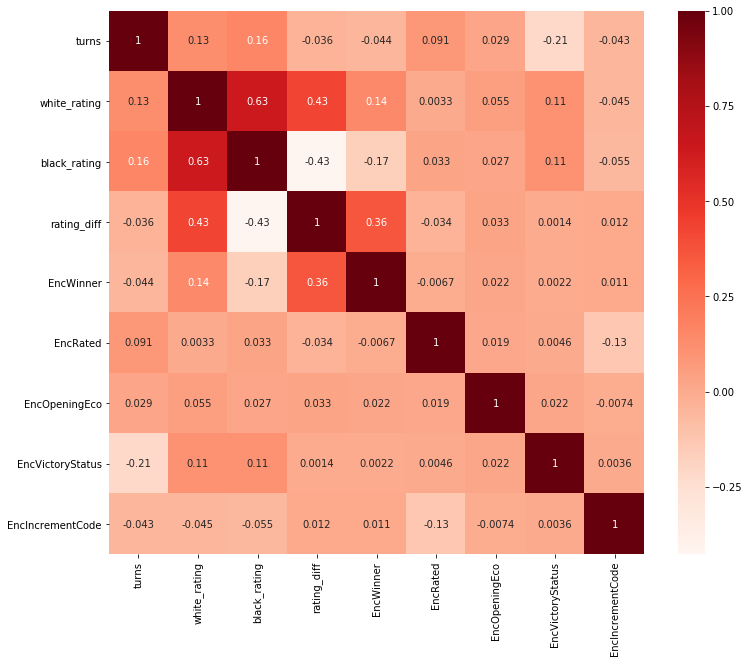

In [22]:
plt.figure(figsize=(12, 10))
cor = data_copy.corr()
sb.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

#### Interpreting the HeatMap

Lookin at the HeatMap, we see that overall there are not many strong correlations that catch our eye. 
A correlation between two variables of over 0.5 is only achieved a few times, with the relationship of player ratings
This is simply due to the fact of players of similar ratings will play against each other. 

The difference of rating is the most highly correlated variable (0.36), this can be considered a moderate correlation

In [23]:
# Lets get the correlation with the output variable (winner)
cor_target = abs(cor["EncWinner"])
relavent_features = cor_target[cor_target > 0.2]
print(relavent_features)


rating_diff    0.360669
EncWinner      1.000000
Name: EncWinner, dtype: float64


#### Increase correlation?

I was dissapointed to see not much correlation between opening played and the result. 
I want to replace the colunm of "opening_eco" to simply the opening move played ("e4", "d4" etc...).

Let's expand on Opening Eco's:

In [24]:
# Number of unique opening eco's in this dataset
print(len(data_copy["EncOpeningEco"].unique()))

365


#### Chess Opening Eco

So, we see above that there are 365 unique Opening Eco's in this dataset, each representing an "opening system", a system can vary in terms of the number of moves inside it, but our goal will be to make it so that we only see that first move played (e.g d4, d4, c4 etc). 

Remember we extracted the openings for the bar chart earlier, let's now reuse those techniques and get both white and black's first move.  

Note that black's first move is (in most cases hopefully) entirely dependent on White's first move. There are however, common opening's used for certain white moves, e.g for "e4" black should respond with "d5", "c5", "c6", "Nf6"...

In [26]:
# Helper function to get first white move 
def get_white_opening(moves):
    return moves[:2]

# Helper function to get first black move
def get_black_opening(moves):
    return moves[3:5]

data_copy["white_opening_move"] = data["moves"].apply(lambda x: get_white_opening(x))
data_copy["black_opening_move"] = data["moves"].apply(lambda x: get_black_opening(x))

# let's encode these columns
data_copy["white_opening_move"] = l_encode.fit_transform(data_copy["white_opening_move"])
data_copy["black_opening_move"] = l_encode.fit_transform(data_copy["white_opening_move"])

data_copy = data_copy.drop(["EncRated", "EncOpeningEco", "EncVictoryStatus", "EncIncrementCode"], axis=1)

data_copy.head()

,turns,white_rating,black_rating,rating_diff,EncWinner,white_opening_move,black_opening_move
0,13,1500,1191,309,2,11,11
1,16,1322,1261,61,0,11,11
2,61,1496,1500,-4,2,13,13
3,61,1439,1454,-15,2,11,11
4,95,1523,1469,54,2,13,13


#### Now, we have the two columns created, let's apply Pearsons again

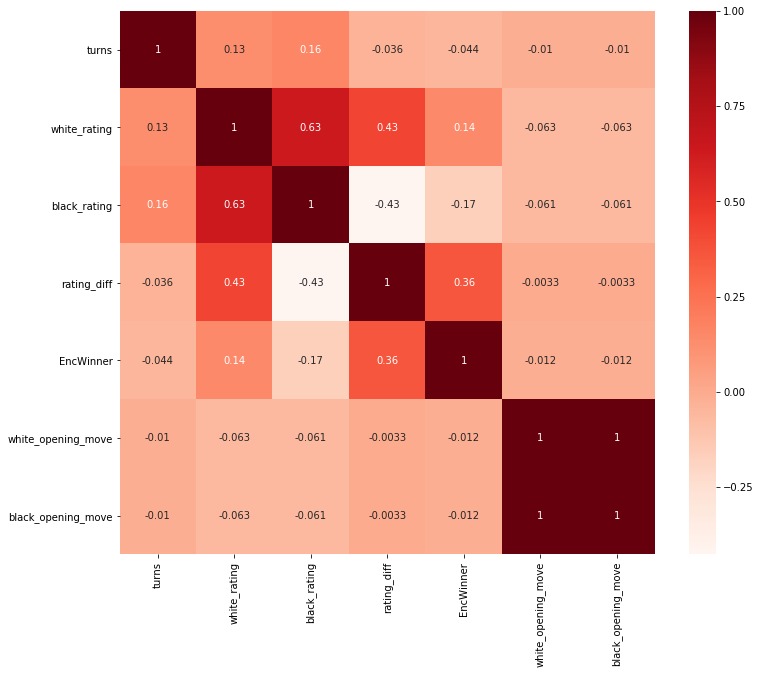

In [27]:
plt.figure(figsize=(12, 10))
cor = data_copy.corr()
sb.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

#### Concluding This section

So, even when we change the opening to just the first move played, we see that there is not much correlation between first moves played and the winner of the game. We, however can see that there is a mild correlation between the rating difference of openings and the outcome of the game ("duh"...). 

#### Reasons why nothing too interesting popped up?

Well, doing more research about openings and thinking things over, I'm thinking that an interesting factor would be:
- which player leaves an opening system first 

I ask this question as most decent chess players (like in the dataset above) will play the correct opening moves ("e4", "d4", "c4"), but the one of the keys to gaining ranking points and winning more is to study lines further and further, moves ahead of time. Opening Systems are basically a set of "recommended or top" moves that will provide optimal play in the current state, so knowing all this, it would be definitely interesting to see if whoever "leaves" the current opening system first determines the winner of the game. There can be many reasons to leaving a system (assuming there are still moves left in the system to play):
   - Unintentionally, Forgetting the line
   - Intentionally, hoping that your openent hasn't studied the differing line (differing from optimal)

This would be interesting to delve into further!